In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("D:\Py Django\DataScience\Random Forest\Classification\Heart.csv")
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [49]:
chestpain = LabelEncoder()
thal = LabelEncoder()

df['ChestPain'] = chestpain.fit_transform(df['ChestPain'])
df['Thal'] = thal.fit_transform(df['Thal'])
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,No
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,Yes
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,No
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,Yes
299,300,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,Yes
300,301,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,Yes
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,Yes


In [59]:
x = df.drop(['AHD','Unnamed: 0'],axis = 1)
y = df['AHD']

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state=30)

In [52]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
x_pred = model.predict(x_test)
x_pred

array(['Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No'], dtype=object)

In [54]:
accuracy = accuracy_score(x_pred,y_test)
accuracy

0.8688524590163934

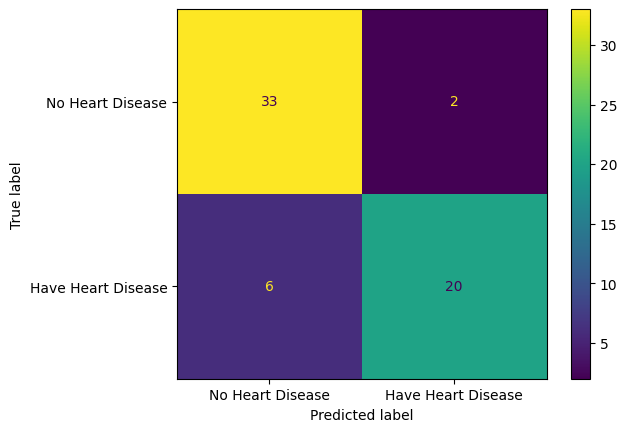

In [55]:
con_matrix = confusion_matrix(x_pred,y_test)
display = ConfusionMatrixDisplay(confusion_matrix= con_matrix  , display_labels = ["No Heart Disease", "Have Heart Disease"])
display.plot()
plt.show()

In [ ]:
new_chestpain = chestpain.transform(["typical"])[0]
new_thal = thal.transform(["reversable"])[0]

new_data = np.array([[70,1,new_chestpain,160,300,0,1,130,0,2.5,2,1,new_thal]])
prediction = model.predict(new_data)
if prediction[0] == 1:
    print("Have Heart Disease")
else:
    print("No Heart Disease")

No Heart Disease


c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
